# How to caption an image using Groq's Llama 4 

We'll use Llama 4 Scout 17B to caption images. Of course you could use any other model (both local and from a different LLM provider), but we thought this would be a good starting point, as Groq has a pretty generous free tier.

> Just make sure to set the `GROQ_API_KEY` environment variable!

In [19]:
from dotenv import load_dotenv

load_dotenv()

True

The first step is to encode the image to a base64 string. This is something we'll do using the sample image from the `data` folder.

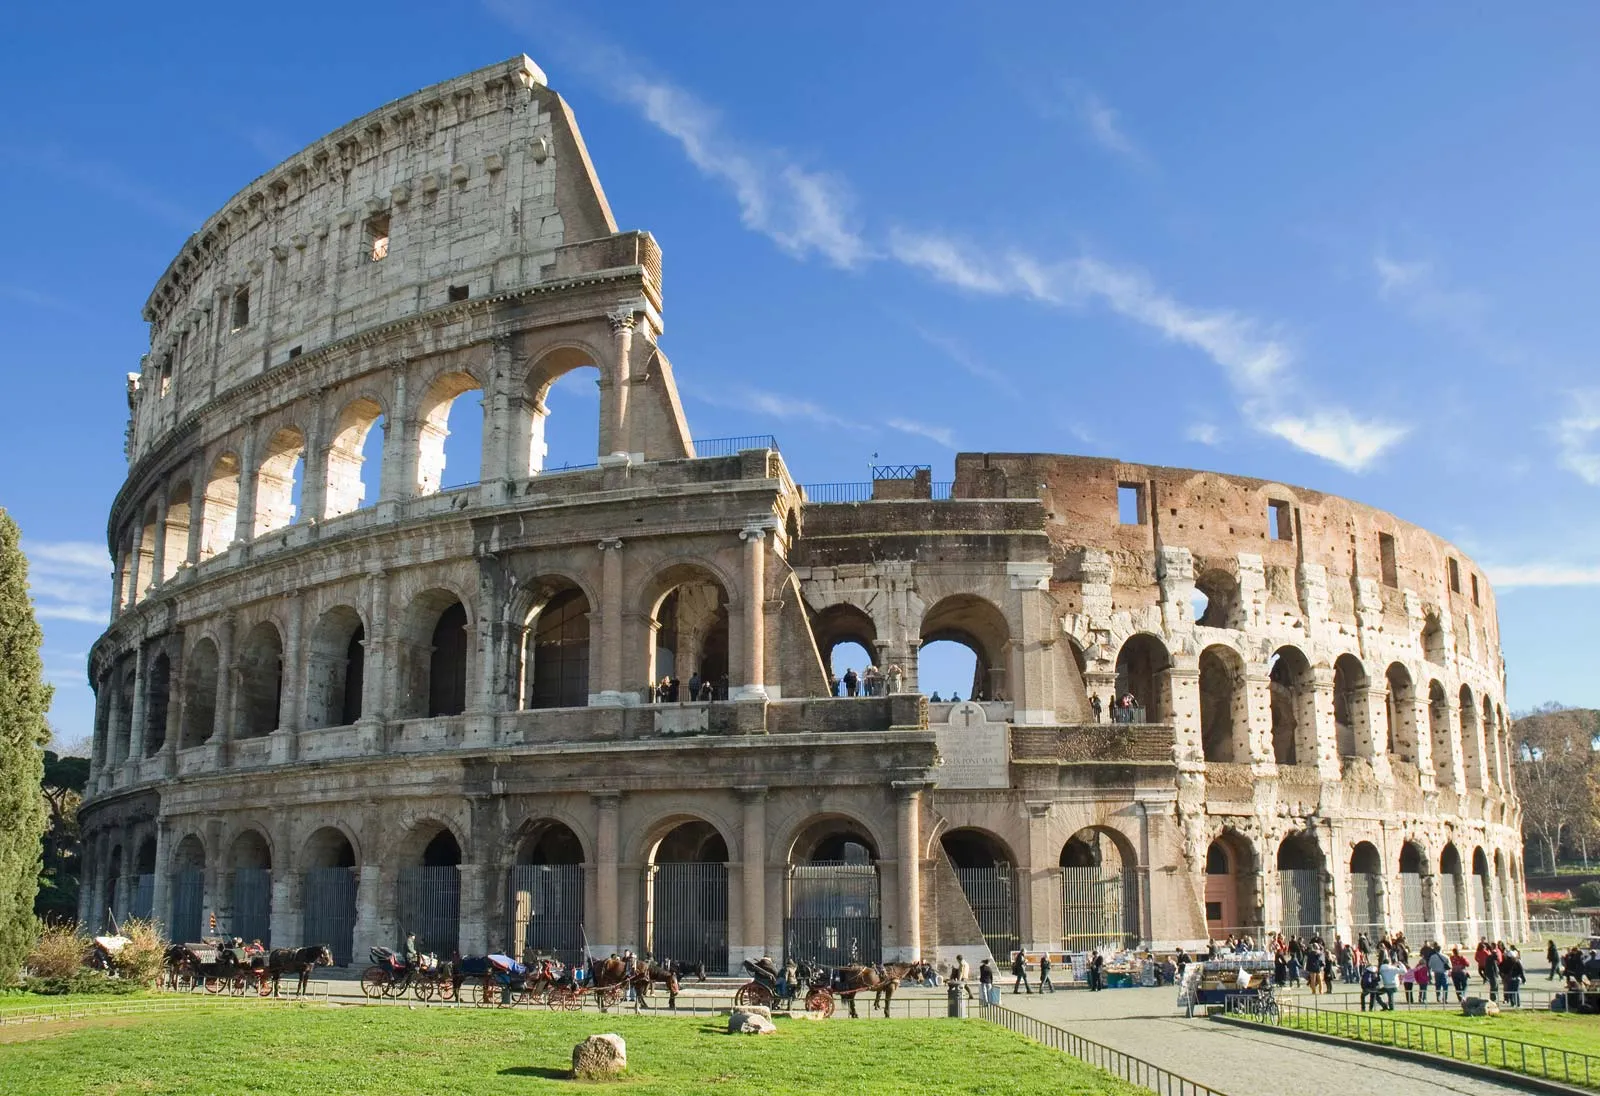

In [8]:
import base64
import os
from io import BytesIO

from groq import Groq
from PIL import Image

image = Image.open("./data/colosseum.png")

image

Now that we have the image, let's encode it to a base64 string.

In [9]:
def encode_image(image: Image.Image) -> str:
    buffered = BytesIO()
    image.save(buffered, format=image.format)
    return base64.b64encode(buffered.getvalue()).decode()


base64_image = encode_image(image)

In [10]:
base64_image[:10]

'iVBORw0KGg'

Now that we have the base64 string, it is time to call the Groq API.

In [13]:
client = Groq(api_key=os.environ.get("GROQ_API_KEY"))

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "Give me a short description of what's in the image"},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{base64_image}",
                    },
                },
            ],
        }
    ],
    model="meta-llama/llama-4-scout-17b-16e-instruct",
)

Here it is! The caption for the image.

In [14]:
print(chat_completion.choices[0].message.content)

The image is a photograph of the partially intact Colosseum in Rome, Italy. The Colosseum is a large, ancient amphitheater with a distinctive elliptical shape and tiered seating. The structure is made of stone and features numerous arches and columns. The image captures the iconic landmark on a sunny day with a blue sky and wispy clouds, surrounded by a grassy area and a few people milling about. Several horse-drawn carriages are parked in front of the Colosseum, adding to the scene's historic charm.


### Visual Captioning Model

The `VisualCaptioningModel` class is a wrapper around the Groq API. It allows you to caption images without having to deal with the API details.

In [15]:
from mcp_server.video_ingestion.caption import VisualCaptioningModel

visual_captioning_model = VisualCaptioningModel()

It works in two ways:
1. By providing an image path and a prompt.
2. By providing an image and a prompt.

Let's see how it works with the sample image from the `data` folder.


In [17]:
visual_captioning_model.caption(
    image="./data/colosseum.png", prompt="Describe the image in less than 10 words"
)

'The Colosseum.'

In [18]:
visual_captioning_model.caption(
    image=image, prompt="Describe the image in less than 10 words"
)

'The Colosseum in Rome, Italy, on a sunny day.'